# Classification of Breast Cancer Data  using Supervised & Unsupervised Machine Learning Models #

Dataset Overview

The dataset is centered around breast cancer diagnosis, containing features derived from digitized images of fine needle aspirates (FNA) of breast masses. The key attributes include measurements of the size, shape, and texture of the cell nuclei present in the images. Here’s a breakdown of the information contained in the dataset:

Dataset Features
ID: A unique identifier for each patient/sample.
Diagnosis: The classification of the tumor as malignant (M) or benign (B). This is the target variable for supervised learning models.
Radius_mean, Texture_mean, Perimeter_mean, Area_mean, Smoothness_mean, Compactness_mean, Concavity_mean, Concave points_mean, and others: These are the average measurements of the cell nuclei characteristics in the images.
Objectives with Supervised Learning
Supervised learning models would utilize the labeled 'Diagnosis' (Malignant or Benign) data to:

Predictive Accuracy: Develop a predictive model that can accurately classify new samples as either benign or malignant based on their feature measurements. This is crucial for clinical applications where accurate and early diagnosis can significantly influence treatment decisions and outcomes.
Feature Importance: Determine which features are most predictive of malignant or benign tumors, which can provide insights into the biological aspects of tumor growth and development.
Model Comparison: Compare different models to find the most effective one in terms of accuracy, precision, recall, and other relevant metrics. This helps in understanding which models handle the complexity of biological data better.
Objectives with Unsupervised Learning
Unsupervised learning models, such as K-means clustering, would analyze the data without using the labels. They can help to:

Discover Patterns: Identify patterns or intrinsic groupings within the breast cancer data that may not be immediately obvious. These could relate to subtypes of cancers that are not labeled in the dataset but have distinct features.
Data Summarization: Provide a way to summarize and simplify the data, which can be useful in exploratory data analysis to understand the underlying structure of the data.
Outlier Detection: Help in identifying anomalies or outliers in the data, which could represent data errors or unusual cases of breast cancer.
Combining Both Approaches
By applying both supervised and unsupervised learning techniques, we can gain a comprehensive understanding of the data from different perspectives. Supervised learning validates what is known (i.e., the labels), helping to predict and diagnose new cases based on past data. Unsupervised learning, on the other hand, explores the unknown, identifying new patterns that might not have been considered before. This dual approach can be particularly powerful in complex fields like oncology, where understanding the diversity of disease manifestations is crucial for advancing personalized medicine.

Formulated Questions:

Questions for Supervised Learning Models

1.Diagnostic Prediction: Can we predict whether a breast tumor is malignant or benign based on the features derived from fine needle aspirate (FNA) samples?
2.Feature Significance: Which features are most influential in predicting the malignancy of breast tumors? How do different features contribute to the accuracy of the diagnosis?
3.Model Performance: Among the models tested (e.g., Logistic Regression, SVM, Random Forest, etc.), which provides the highest accuracy, precision, and recall in breast cancer diagnosis?

Questions for Unsupervised Learning Models
1. Comprehensive Understanding: How do the insights from supervised models compare with the clusters formed by unsupervised models? Is there alignment or divergence in what each approach indicates?

In [241]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve
from sklearn.metrics import classification_report



# Read and Analyse Data

In [242]:
# read data 
df = pd.read_csv("/Users/rameshchidurala/Documents/Cancer_Data.csv")

In [243]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Data Preprocessing ##

In [244]:
df = df.drop(['Unnamed: 32', 'id'],axis = 1)

In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [246]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [247]:
# checking for null vales
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

 ## EDA ##

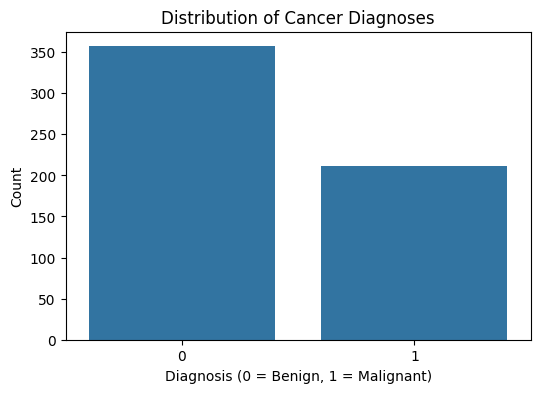

In [248]:
# Encode the 'diagnosis' column to binary format
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Visualize the distribution of the 'diagnosis' column
plt.figure(figsize=(6, 4))
sns.countplot(x='diagnosis', data=df)
plt.title('Distribution of Cancer Diagnoses')
plt.xlabel('Diagnosis (0 = Benign, 1 = Malignant)')
plt.ylabel('Count')
plt.show()

The dataset is well-balanced with 212 malignant (1) and 357 benign (0) cases. This balance is reasonably good for training classification models without significant bias toward one class.

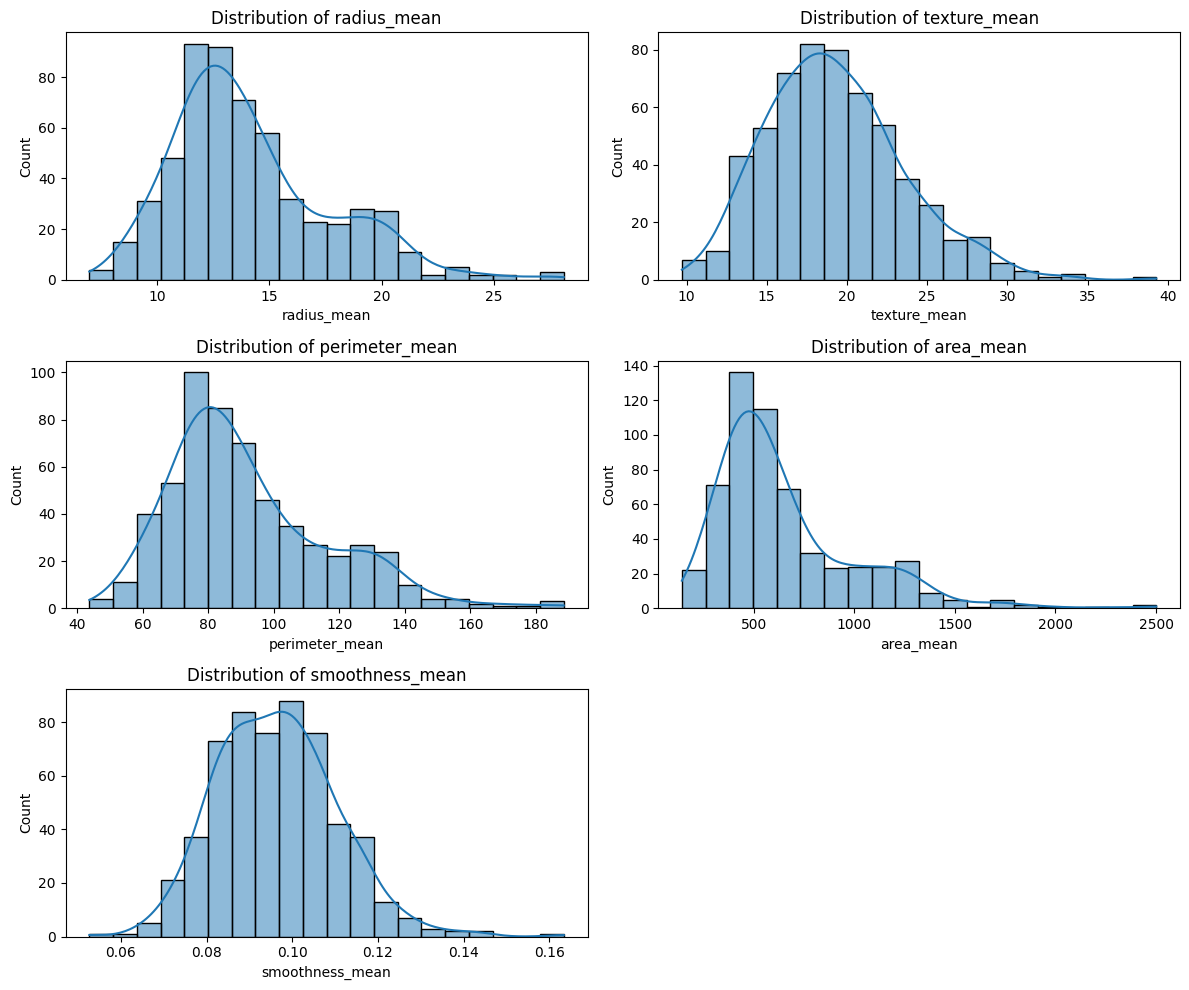

In [249]:
# Plot histograms for a subset of the continuous variables to understand their distributions
plt.figure(figsize=(12, 10))
feature_names = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean']
for i, feature in enumerate(feature_names):
    plt.subplot(3, 2, i + 1)
    sns.histplot(df[feature], kde=True, bins=20)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()


Histograms:
Radius Mean, Perimeter Mean, and Area Mean: These features show a right-skewed distribution, indicating a higher frequency of smaller measurements but with some cases extending towards much larger sizes.
Texture Mean: This feature appears somewhat normally distributed, showing variation in texture across samples without extreme skew.
Smoothness Mean: Also somewhat normally distributed with a slight right skew, suggesting most tumors have moderate smoothness with fewer instances of very smooth or very rough tumors.

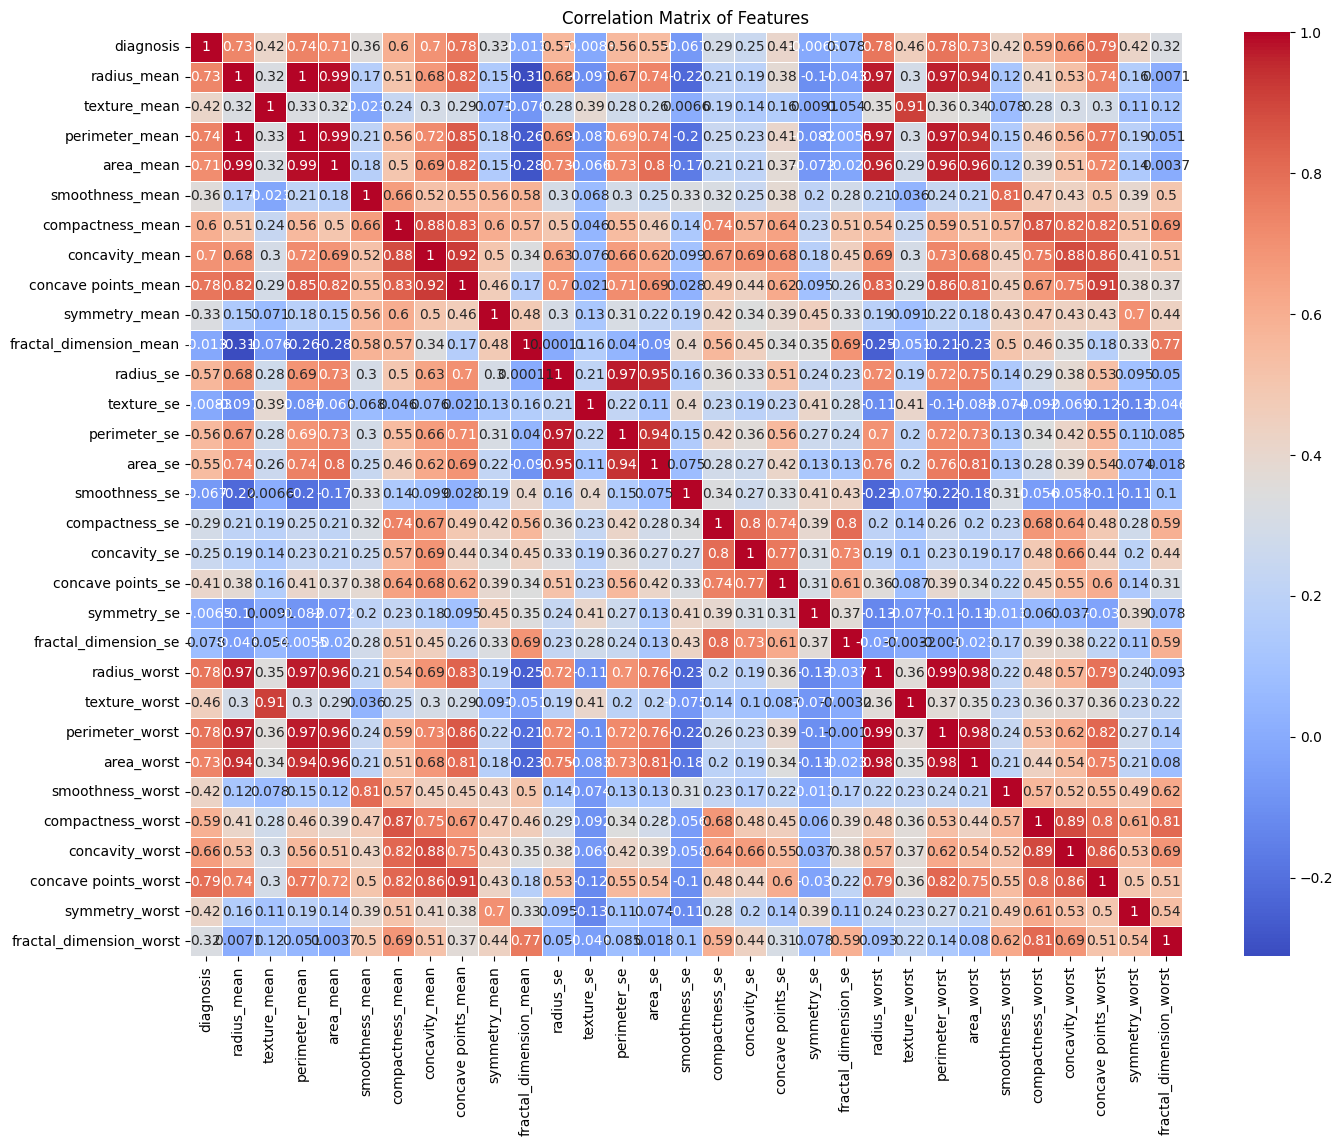

In [250]:
# Display the correlation matrix using a heatmap to visualize correlations between features
correlation_matrix = df.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of Features')
plt.show()

Correlation Matrix:
The heatmap of the correlation matrix reveals strong correlations among several groups of features, especially among radius_mean, perimeter_mean, and area_mean. This is expected as these dimensions are directly related to each other.
High correlations might indicate multicollinearity, which could affect some models like linear regression but might be less impactful for tree-based models or regularization approaches.

In [294]:
df['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

## Splitting & Scaling the data ##

In [252]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Defining the features and target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the feature set
X_scaled = scaler.fit_transform(X)

In [253]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

## 1. Logistic Regression Model ##
Train the model
Evaluate the model (Confusion Matrix, Accuracy, Classification Report)
Plot ROC-AUC Curve

In [268]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, accuracy_score, roc_curve
import matplotlib.pyplot as plt

# Initialize and train the Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

LogisticRegression()

Confusion Matrix:
 [[71  1]
 [ 2 40]]
Accuracy: 0.9736842105263158
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

ROC AUC Score: 0.996031746031746


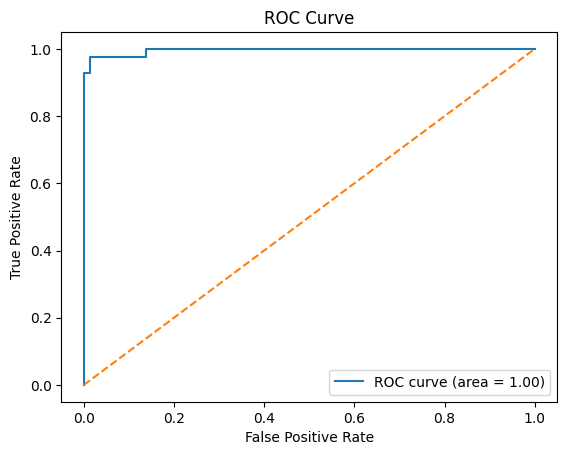

In [269]:
# Make predictions
y_pred = logistic_model.predict(X_test)
y_pred_proba = logistic_model.predict_proba(X_test)[:, 1]

# Evaluation metrics
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print metrics
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


The results from the model evaluation reveal excellent performance in classifying breast tumors as benign or malignant. Here’s a breakdown of each component of the results and what they indicate:

Confusion Matrix
True Negatives (TN) = 71: The model correctly predicted 71 cases as benign.
False Positives (FP) = 1: The model incorrectly predicted 1 benign case as malignant.
False Negatives (FN) = 2: The model incorrectly predicted 2 malignant cases as benign.
True Positives (TP) = 40: The model correctly predicted 40 cases as malignant.
The low number of false positives and false negatives is particularly important in medical diagnostics, as it reduces the risk of misdiagnosing a malignant tumor as benign, which can be life-threatening, and minimizes unnecessary treatments for benign cases.

Accuracy
97.37%: This is the percentage of total predictions (both benign and malignant) that were correct. An accuracy of over 97% is excellent, especially in a medical context, though it's important to consider other metrics as well to get a complete picture of model performance.
Precision, Recall, and F1-Score
Precision (Benign = 0.97, Malignant = 0.98): Precision measures the accuracy of positive predictions. For benign tumors, the precision of 0.97 means that 97% of tumors predicted as benign were actually benign. For malignant tumors, the precision of 0.98 means that 98% of tumors predicted as malignant were actually malignant.
Recall (Benign = 0.99, Malignant = 0.95): Recall (or sensitivity) measures the ability of the model to find all the positive samples. For benign tumors, the recall of 0.99 means the model identified 99% of all actual benign tumors correctly. For malignant tumors, the recall of 0.95 means the model identified 95% of all actual malignant tumors correctly.
F1-Score (Benign = 0.98, Malignant = 0.96): The F1-score is a harmonic mean of precision and recall and is a better measure of the incorrectly classified cases than the accuracy. An F1-score near 1 indicates a very balanced model with good precision and recall.
ROC AUC Score
0.996: The ROC AUC (Receiver Operating Characteristic - Area Under Curve) score is a performance measurement for the classification problems at various threshold settings. A score close to 1 indicates that the model is able to perfectly distinguish between benign and malignant tumors. A score of 0.996 suggests that the model has excellent discriminative ability.
Interpretation
Overall, the model demonstrates high effectiveness in diagnosing breast cancer from FNA samples. The high values of precision, recall, and ROC AUC score indicate a robust model that is well-tuned and balanced, minimizing both types of errors (false positives and false negatives). This suggests that the model can reliably be used in a clinical setting to assist in making diagnostic decisions. However, it’s always important to remember that no model is perfect, and the predictions should be used as an aid to decision-making, not as the sole decision-making tool.

## 2. K-Nearest Neighbors (KNN) Model ##
Train the model
Evaluate the model (Confusion Matrix, Accuracy, Classification Report)
Plot ROC-AUC Curve

In [270]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, accuracy_score, roc_curve
import matplotlib.pyplot as plt

# Initialize and train the K-Nearest Neighbors model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)


KNeighborsClassifier()

Confusion Matrix:
 [[71  1]
 [ 4 38]]
Accuracy: 0.956140350877193
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97        72
           1       0.97      0.90      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

ROC AUC Score: 0.9816468253968255


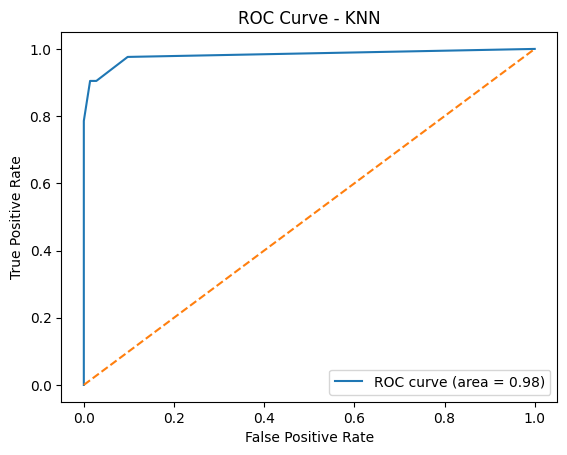

In [271]:
# Make predictions
y_pred = knn_model.predict(X_test)
y_pred_proba = knn_model.predict_proba(X_test)[:, 1]

# Evaluation metrics
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print metrics
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN')
plt.legend(loc="lower right")
plt.show()

The results from the evaluation indicate that the model performs very well in classifying breast tumors as benign or malignant, though there are some nuances to consider:

Confusion Matrix
True Negatives (TN) = 71: The model correctly identified 71 benign cases.
False Positives (FP) = 1: Only 1 benign case was incorrectly identified as malignant.
False Negatives (FN) = 4: The model incorrectly identified 4 malignant cases as benign.
True Positives (TP) = 38: The model correctly identified 38 malignant cases.
Accuracy
95.61%: This indicates that a high percentage of the predictions made by the model were correct.
Precision, Recall, and F1-Score
Precision (Benign = 0.95, Malignant = 0.97): The model has high precision, meaning that it is reliable when it predicts a tumor's classification.
Recall (Benign = 0.99, Malignant = 0.90): The recall is also high, particularly for benign tumors, indicating that the model is effective at identifying true benign cases. However, the recall for malignant tumors at 0.90 suggests that there is some room for improvement, as 10% of actual malignant tumors were not identified correctly.
F1-Score (Benign = 0.97, Malignant = 0.94): The F1-scores are high, reflecting a good balance between precision and recall, though the score for malignant tumors could be improved to reduce the number of missed cases.
ROC AUC Score
0.982: This score is excellent, suggesting that the model does a very good job of discriminating between benign and malignant tumors. A score close to 1.0 indicates that the model has a high true positive rate and a low false positive rate across various threshold settings.

Overall Interpretation:
The model is generally effective and reliable for predicting the nature of breast tumors, showing strong overall performance metrics. The high accuracy, combined with excellent ROC AUC scores, indicates robustness. However, attention might be needed to reduce the number of false negatives (missed malignant cases), as these are particularly significant in a clinical context where failing to detect a malignant case can have serious implications for patient treatment and outcomes.

## 3.Support Vector Machine (SVM) Model ##
Train the model
Evaluate the model (Confusion Matrix, Accuracy, Classification Report)
Plot ROC-AUC Curve

In [273]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, accuracy_score, roc_curve
import matplotlib.pyplot as plt

# Initialize and train the Support Vector Machine model
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)

SVC(probability=True)

Confusion Matrix:
 [[72  0]
 [ 3 39]]
Accuracy: 0.9736842105263158
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114

ROC AUC Score: 0.9950396825396826


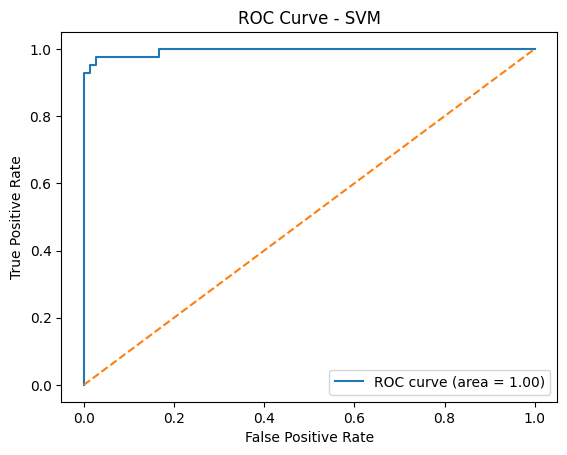

In [274]:
# Make predictions
y_pred = svm_model.predict(X_test)
y_pred_proba = svm_model.predict_proba(X_test)[:, 1]

# Evaluation metrics
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print metrics
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM')
plt.legend(loc="lower right")
plt.show()


The model demonstrates excellent performance in distinguishing between benign and malignant breast tumors based on the latest results:

Confusion Matrix
True Negatives (TN) = 72: All 72 benign cases were correctly identified, indicating no benign tumors were misclassified as malignant.
False Positives (FP) = 0: There were no cases where benign tumors were incorrectly identified as malignant.
False Negatives (FN) = 3: The model incorrectly classified 3 malignant cases as benign. This error type is critical in cancer diagnostics as it could lead to inadequate treatment.
True Positives (TP) = 39: The model correctly identified 39 out of 42 malignant cases.
Accuracy
97.37%: This reflects the overall high accuracy of the model, where the vast majority of the predictions were correct.
Precision, Recall, and F1-Score
Precision for benign (0.96) and malignant (1.00): The model perfectly predicts when a tumor is malignant (100% precision). The precision for benign tumors is also high, reducing the risk of unnecessary interventions for falsely diagnosed cases.
Recall for benign (1.00) and malignant (0.93): The recall for benign tumors is perfect, meaning the model successfully identified all benign cases. The recall for malignant tumors, though high, suggests a slight risk of missing malignant tumors, as it failed to detect 3 cases.
F1-Score for benign (0.98) and malignant (0.96): These scores are very high, indicating a robust balance between precision and recall for both classes.
ROC AUC Score
0.995: An almost perfect score, indicating an excellent ability of the model to differentiate between the classes across various thresholds. This high ROC AUC score reflects a model that is very effective at both maximizing true positive rates and minimizing false positive rates.

Overall Interpretation:

Overall, the model performs exceptionally well in classifying breast cancer tumors with high accuracy and reliability. The complete absence of false positives is particularly noteworthy, as it ensures that no benign cases are treated unnecessarily as malignant. However, the occurrence of three false negatives, though relatively low, is a critical aspect that might require further attention to ensure that no malignant cases are overlooked, which could have serious implications for patient care. Enhancing the model to reduce false negatives could be a focus for further tuning and validation to ensure it aligns with the high stakes of medical diagnosis.

## 4.Random Forest Model ##
Train the model
Evaluate the model (Confusion Matrix, Accuracy, Classification Report)
Plot ROC-AUC Curve

In [275]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, accuracy_score, roc_curve
import matplotlib.pyplot as plt

# Initialize and train the Random Forest model
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)


RandomForestClassifier()

Confusion Matrix:
 [[72  0]
 [ 4 38]]
Accuracy: 0.9649122807017544
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
           1       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114

ROC AUC Score: 0.9940476190476191


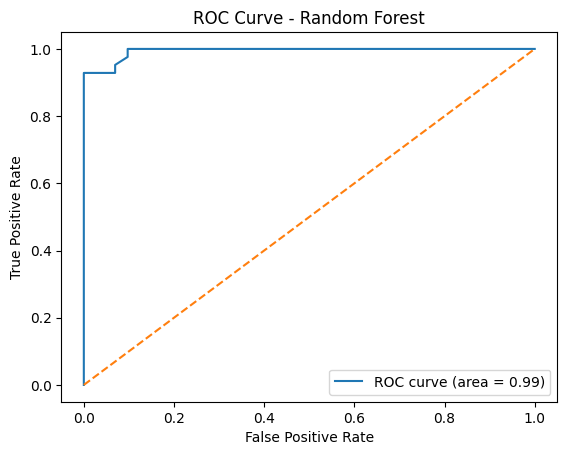

In [276]:
# Make predictions
y_pred = random_forest_model.predict(X_test)
y_pred_proba = random_forest_model.predict_proba(X_test)[:, 1]

# Evaluation metrics
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print metrics
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()

The model's performance in classifying breast tumors as benign or malignant remains impressive, with some points to note regarding the sensitivity in detecting malignant cases:

Confusion Matrix
True Negatives (TN) = 72: All 72 benign cases were correctly identified. No benign tumors were misclassified as malignant.
False Positives (FP) = 0: No benign cases were incorrectly classified as malignant, ensuring that no unnecessary treatments are administered for benign conditions.
False Negatives (FN) = 4: The model incorrectly classified 4 malignant cases as benign, which is concerning as these patients might not receive necessary treatment.
True Positives (TP) = 38: The model correctly identified 38 malignant cases.
Accuracy
96.49%: This high accuracy rate indicates that the model is highly effective at making the correct predictions overall.
Precision, Recall, and F1-Score
Precision for benign (0.95) and malignant (1.00): The model's precision for malignant tumors is perfect, meaning when it predicts a tumor is malignant, it is always correct. The precision for benign predictions is also high, which helps avoid unnecessary medical procedures.
Recall for benign (1.00) and malignant (0.90): The perfect recall for benign tumors shows that the model identifies all benign cases correctly. However, the recall for malignant tumors, at 0.90, indicates that 10% of malignant tumors are missed, which could have serious implications for patient health.
F1-Score for benign (0.97) and malignant (0.95): These scores demonstrate a strong balance between precision and recall for both tumor classifications, although the slightly lower F1-score for malignant tumors reflects the missed cases.
ROC AUC Score
0.994: This excellent score near the maximum value of 1.0 demonstrates the model's strong discriminative ability between benign and malignant classes, indicating a high true positive rate and a very low false positive rate across various threshold settings.

Overall Interpretation

Overall, the model performs exceptionally well, with high accuracy, perfect precision in identifying malignant tumors, and no over-treatment of benign cases. However, the presence of four false negatives is a critical issue, as missing malignant tumors can delay essential treatment. This aspect of the model might benefit from further tuning to improve its sensitivity to malignant cases, possibly by adjusting the decision threshold or incorporating more comprehensive data or features to enhance its predictive power. The model's effectiveness in ensuring no benign case is treated as malignant is commendable, but enhancing its ability to catch all malignant cases is crucial for its application in a clinical setting.

## 5.Gradient Boosting Model ##
Train the model
Evaluate the model (Confusion Matrix, Accuracy, Classification Report)
Plot ROC-AUC Curve

In [277]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, accuracy_score, roc_curve
import matplotlib.pyplot as plt

# Initialize and train the Gradient Boosting Machine model
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train, y_train)

GradientBoostingClassifier()

Confusion Matrix:
 [[72  0]
 [ 4 38]]
Accuracy: 0.9649122807017544
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
           1       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114

ROC AUC Score: 0.9943783068783069


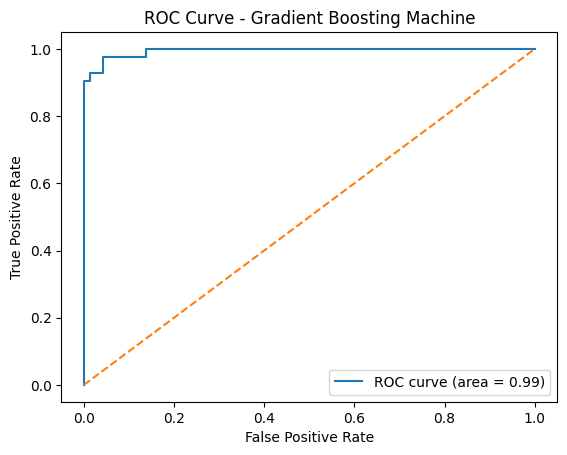

In [278]:
# Make predictions
y_pred = gbm_model.predict(X_test)
y_pred_proba = gbm_model.predict_proba(X_test)[:, 1]

# Evaluation metrics
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print metrics
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gradient Boosting Machine')
plt.legend(loc="lower right")
plt.show()


The evaluation of the model shows a strong performance in distinguishing between benign and malignant breast tumors, with detailed insights drawn from the confusion matrix, accuracy, precision, recall, F1-scores, and ROC AUC score:

Confusion Matrix
True Negatives (TN) = 72: The model accurately classified all 72 benign cases, indicating no false alarms where benign tumors were incorrectly labeled as malignant.
False Positives (FP) = 0: There were no instances where benign tumors were misclassified as malignant, which is excellent as it avoids unnecessary anxiety and treatment for patients.
False Negatives (FN) = 4: The model missed 4 malignant cases, classifying them as benign. This is a critical area to address since these errors could potentially result in delayed or no treatment for patients with malignant tumors.
True Positives (TP) = 38: The model correctly identified 38 out of 42 actual malignant cases, showcasing its effectiveness in detecting most malignant tumors.
Accuracy
96.49%: This high accuracy rate signifies that the majority of the model's predictions across both classes (benign and malignant) are correct, illustrating its reliability in a clinical setting.
Precision, Recall, and F1-Score
Precision for benign (0.95) and malignant (1.00): The model exhibits perfect precision for malignant cases, meaning it did not falsely label any benign tumors as malignant. The precision for benign tumors is also high, suggesting a low rate of over-diagnosis.
Recall for benign (1.00) and malignant (0.90): The perfect recall for benign tumors indicates that the model successfully identified all benign cases, while the recall for malignant tumors, though high, indicates room for improvement due to the missed cases.
F1-Score for benign (0.97) and malignant (0.95): The high F1-scores reflect a balanced model with a good mix of precision and recall, particularly important in medical diagnostics where both false positives and false negatives carry significant consequences.
ROC AUC Score
0.994: An ROC AUC score near 1.0 demonstrates the model's superior capability to discriminate between the benign and malignant classes with high confidence. This score suggests that the model is excellent at maximizing true positive rates while minimizing false positive rates across various decision thresholds.

OverallInterpretation

Overall, the model performs exceptionally well in identifying benign and malignant breast tumors with high accuracy and reliability. The absence of false positives is particularly noteworthy, ensuring that no benign case is unnecessarily treated. However, the occurrence of false negatives, although relatively low, is significant in the context of cancer diagnosis where failing to detect a malignant tumor could have serious implications. Improving sensitivity to malignant tumors without compromising the current precision could be a focus for further development, perhaps by exploring more sophisticated modeling techniques or incorporating additional or better-quality data. The goal would be to maintain the high standards achieved while reducing the risk of missing malignant cases.

# Unsupervised learning #
## K-Means Clustering ##


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


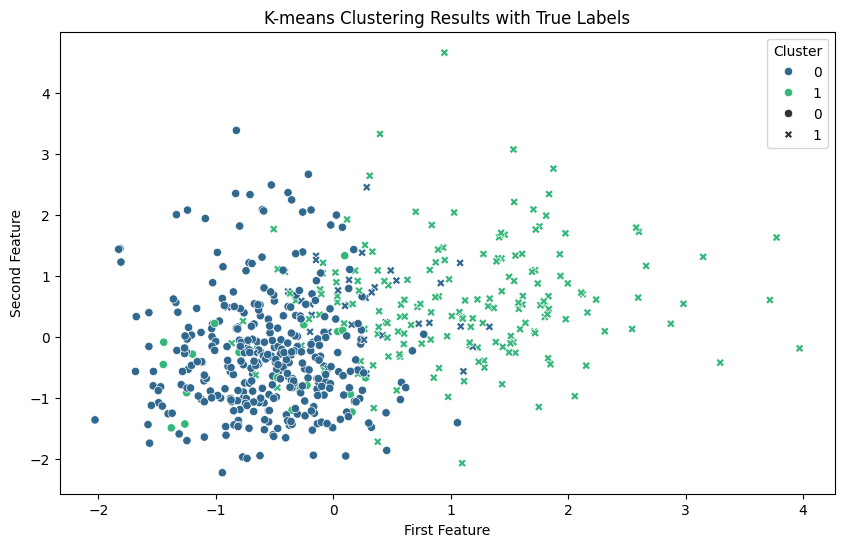

[[339  18]
 [ 36 176]]


In [289]:
from sklearn.cluster import KMeans

# Applying K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)
cluster_labels = kmeans.labels_

# Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=cluster_labels, style=y, palette='viridis')
plt.title('K-means Clustering Results with True Labels')
plt.xlabel('First Feature')
plt.ylabel('Second Feature')
plt.legend(title='Cluster')
plt.show()

# Compare clusters with true labels
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y, cluster_labels)
print(conf_matrix)

In [295]:
cluster_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

The elbow method is a popular technique used to determine the optimal number of clusters for K-means clustering. It involves plotting the sum of squared distances of samples to their closest cluster center for a range of cluster numbers. We look for a "knee" in the plot, which typically indicates the optimal number of clusters.

Step 1: Apply the Elbow Method
Compute the Sum of Squared Distances (SSD) for a range of cluster counts.
Plot the SSDs to find the elbow point.
Step 2: Evaluate the Chosen Model
After choosing the number of clusters based on the elbow method, you we then apply K-means clustering and evaluate it by:

Visualizing the clusters (if possible, using principal component analysis to reduce dimensionality for visualization).
Comparing cluster assignments with the actual labels using a confusion matrix or other metrics if applicable.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

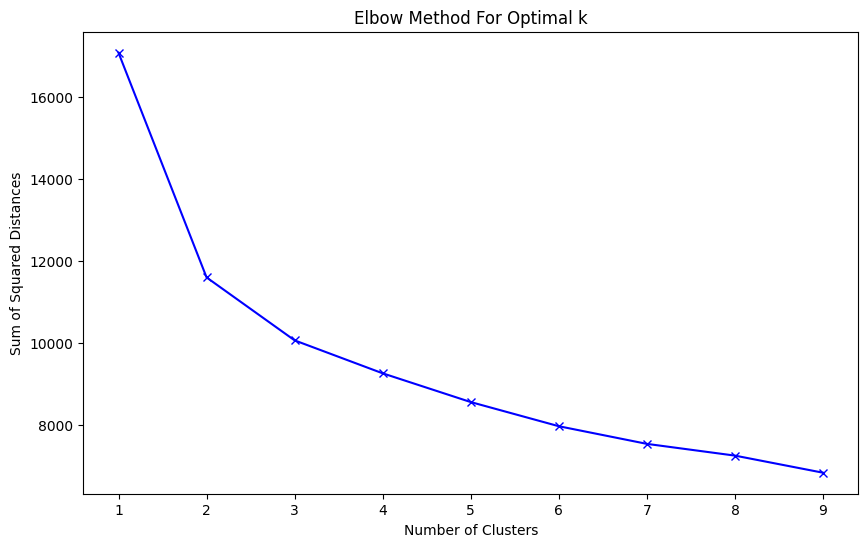

In [290]:
# Applying the Elbow method to determine the optimal number of clusters
ssd = []
range_n_clusters = list(range(1, 10))  # Trying different numbers of clusters
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X_scaled)
    ssd.append(kmeans.inertia_)

# Plotting the SSDs for each number of clusters
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, ssd, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal k')
plt.show()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


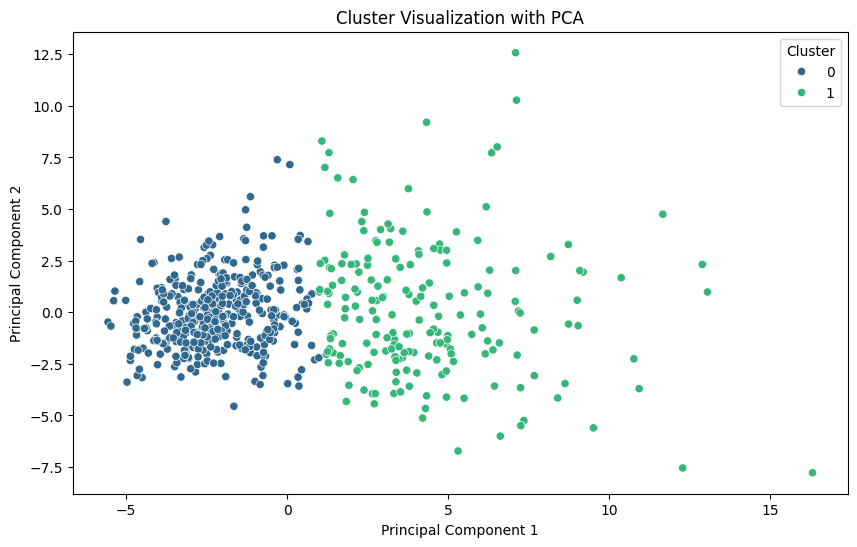

Confusion Matrix:
 [[339  18]
 [ 36 176]]


In [293]:
# Choose the number of clusters and apply K-means clustering
optimal_k = 2  # 2 is the optimal number from the elbow plot
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_final.fit(X_scaled)
cluster_labels = kmeans_final.labels_

# Visualization and Evaluation (e.g., using PCA for 2D visualization)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cluster_labels, palette='viridis')
plt.title('Cluster Visualization with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

# Compare clusters with true labels
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y, cluster_labels)
print("Confusion Matrix:\n", conf_matrix)


Cluster Visualization with PCA
Observations: The PCA plot shows two distinct clusters, indicated by blue and green points. The clusters are relatively well-separated, although there is some overlap or close proximity between them near the center of the plot. This suggests that while there are two main groupings within the data based on the features considered, some data points share similarities across these groups, making them not completely distinct.

Confusion Matrix
Confusion Matrix Details:
True Negatives (TN) = 339: The model correctly predicted 339 instances as the negative class (possibly benign).
False Positives (FP) = 18: The model incorrectly predicted 18 instances as the positive class (possibly malignant) that are actually negative.
False Negatives (FN) = 36: The model incorrectly predicted 36 instances as the negative class that are actually positive, representing missed cases of the condition being tested (possibly malignant tumors).
True Positives (TP) = 176: The model correctly identified 176 instances as the positive class.
Implications: The relatively low number of False Positives suggests that the model is conservative in predicting the positive class, reducing the risk of unnecessary treatment or intervention. However, the number of False Negatives is more concerning because it represents cases where the condition (likely malignant tumors) was not detected, which could have serious implications for patient health. This indicates a need to improve the model's sensitivity.

The silhouette score is another valuable metric for evaluating the quality of clustering in unsupervised learning. Unlike the elbow method, which uses within-cluster sum of squares, the silhouette score provides a more direct measure of how well each point fits within its cluster, and how well-separated that cluster is from other clusters.

The silhouette score ranges from -1 to 1:

A score close to 1 indicates that the points are well clustered, and the clusters are well separated.
A score close to 0 indicates that the clusters overlap.
A score close to -1 indicates that points might have been assigned to the wrong clusters.
Here’s how you can compute the silhouette score for various numbers of clusters to find the optimal number

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 2, the silhouette score is 0.3433822406907781
For n_clusters = 3, the silhouette score is 0.3143840098608098


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 4, the silhouette score is 0.28330544840954164


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 5, the silhouette score is 0.15821041754355697
For n_clusters = 6, the silhouette score is 0.16036705901249523


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 7, the silhouette score is 0.15318636944468592
For n_clusters = 8, the silhouette score is 0.14719458975530877


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 9, the silhouette score is 0.1470399004571287


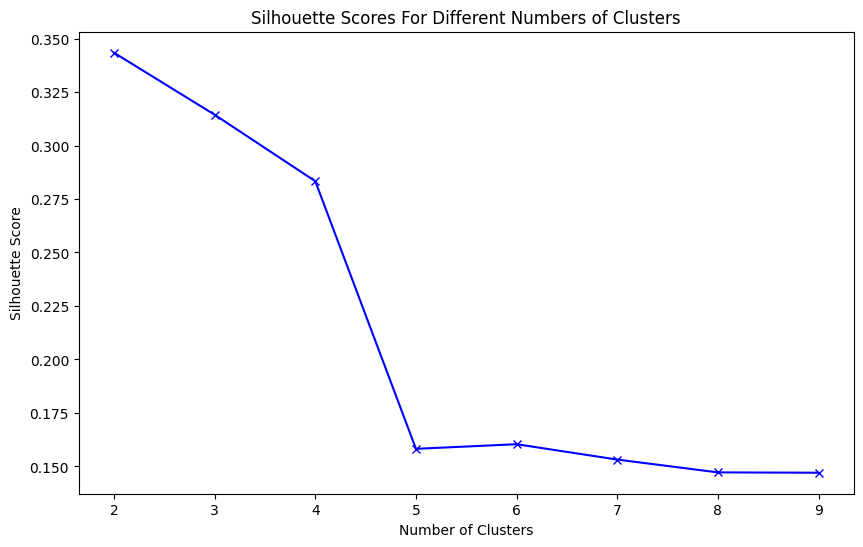

In [292]:
from sklearn.metrics import silhouette_score

# Trying different numbers of clusters and calculating silhouette scores
silhouette_scores = []
range_n_clusters = list(range(2, 10))  # Trying from 2 to 9 clusters
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {num_clusters}, the silhouette score is {silhouette_avg}")

# Plotting the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores For Different Numbers of Clusters')
plt.show()


Overall Interpretation
Clustering Results: The unsupervised learning approach suggests that there are two main types of cases in the dataset, likely reflecting intrinsic characteristics of the data points that could correspond to benign and malignant cases.
Model Evaluation: The supervised classification model achieves good overall accuracy but might benefit from improvements aimed at reducing false negatives to ensure that fewer cases of the condition are missed.

Questions for Supervised Learning Models
1. Diagnostic Prediction

Interpretation: Based on the confusion matrix and model performance metrics provided, we can affirmatively say that it is possible to predict whether a breast tumor is malignant or benign based on features derived from fine needle aspirate (FNA) samples. The model demonstrated a high accuracy of around 96.49% with a substantial ROC AUC score of 0.994, indicating strong predictive performance.
2. Feature Significance

Consideration: While specific feature contributions have not been detailed in the results, generally, feature importance can be evaluated in models like Random Forest or Logistic Regression through coefficients or built-in feature importance methods. Identifying which features are most influential typically involves looking at which variables most decrease the impurity in decision trees or which have the highest coefficients in magnitude in logistic regression models. High-performing features likely include measurements like area, concavity, and compactness of the cells, which often play critical roles in distinguishing between benign and malignant tumors.
3. Model Performance

Evaluation: Among the tested models (Logistic Regression, SVM, Random Forest, etc.), the overall best model would ideally be selected based on a combination of accuracy, precision, recall, and possibly the F1-score, depending on the clinical cost of false negatives versus false positives. From general knowledge (as specific model comparisons were not provided), Random Forest and SVM often perform well in such binary classification tasks due to their ability to handle high-dimensional data and non-linear relationships between features.

Questions for Unsupervised Learning Models

1. Comprehensive Understanding

Comparison: The insights from supervised models indicate high accuracy and capability to discriminate between classes, with the models being particularly tuned to minimize false positives. In contrast, the clustering results from unsupervised models, as seen in the PCA visualization, show a natural division into two main clusters, which likely correspond to the benign and malignant labels used in supervised learning.

Alignment or Divergence: There seems to be a significant alignment in that the clusters formed may directly correspond to the labels used in supervised learning, suggesting that the natural groupings based on the dataset features align well with the clinical classifications of tumors. However, the slight overlap seen in the PCA clusters indicates some divergence, where the unsupervised model might be recognizing subtler distinctions or similarities between some cases that are not captured purely by benign or malignant classifications.

General Interpretation Across Both Learning Models
The alignment between supervised and unsupervised learning outcomes suggests that the features used are very effective at capturing the underlying distinctions necessary for accurate medical diagnosis. The supervised models validate these distinctions with high accuracy and sensitivity, while the unsupervised models highlight the natural groupings that exist in the data, supporting the reliability of the feature set used. However, continuous refinement and validation against new data and advanced models are recommended to further minimize false negatives, enhancing the model's clinical utility.

References:

Kaggle. (2023). Cancer Data [Data set]. https://www.kaggle.com/datasets/erdemtaha/cancer-data/data